Tugas 1 :
Classifying Random Datas

- Coding Linear clasifier (copy-paste dari ppt)

- Coding Linear classifier pake Keras, versi mudah

Tugas 2 :
Binary Classification untuk review video IMDB

- Modify to get performance yang lebih baik

- Menabahkan jumlah hidden layer,  try different "loss function" mse, try different "activation" tanh

- Tambahkan performencenya, add performance evaluation. Plot the accuracy in graph

Tugas 3 :
Reuter NewsWire Classification

- Modify the code to get a higher / better performence


Tugas 4 :
Housing Prices (Regression Problem)

- Regression problem, last layer has single unit and no activation

- loss = mse and metrics = mae. With little


# **Linear Classifier without Keras**

In [ ]:
import tensorflow as tf
import numpy as np

An array of zeroes and ones with a shape of (2000,1)

In [ ]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

inputs = np.vstack((
    negative_samples,
    positive_samples
)).astype(np.float32)


In [ ]:
targets = np.vstack((
    np.zeros((
        num_samples_per_class,1),
        dtype = "float32"),
    np.ones(
        (num_samples_per_class,1),
        dtype = "float32")))




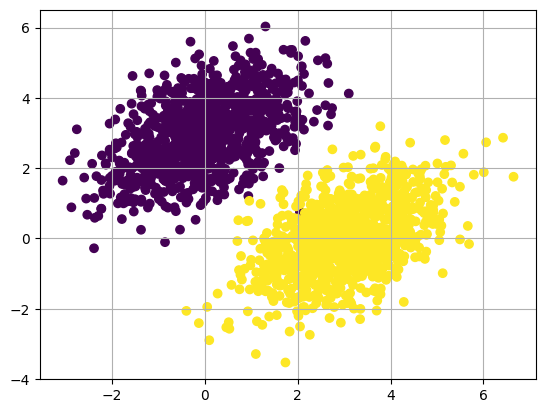

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c = targets[:,0])
plt.grid()
plt.show()

Create a linear classifier with relu functions

$$
output = relu(dot(input,weight)+bias)
$$

In [ ]:
input_dimension = 2
output_dimension = 1

Weight = tf.Variable(initial_value = tf.random.uniform(
    shape = (input_dimension, output_dimension)
))

Bias = tf.Variable(initial_value = tf.random.uniform(
    shape = (output_dimension, )
))

Linear classifier that operates on 2D inputs

In [ ]:
def model_without_keras(inputs) :
  return tf.matmul(inputs, Weight) + Bias

for a given input points, [x,y], its prediction value are
$$
[[w1],[w2]] \cdot [x,y] + b = w1*x + w2*y + b
$$

Loss function :

In [ ]:
def square_loss (targets, predictions) :
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets) :
  with tf.GradientTape() as tape :
    predictions = model_without_keras(inputs)
    loss = square_loss(predictions, targets)
  gradient_loss_wrt_Weight, gradient_loss_wrt_Bias = tape.gradient(loss, [Weight, Bias])
  Weight.assign_sub(gradient_loss_wrt_Weight * learning_rate)
  Bias.assign_sub(gradient_loss_wrt_Bias * learning_rate)
  return loss

Training Loop, in batches

In [ ]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"loss at step {step} : {loss:.4f}")

loss at step 0 : 8.6487
loss at step 1 : 0.9588
loss at step 2 : 0.1306
loss at step 3 : 0.0409
loss at step 4 : 0.0310
loss at step 5 : 0.0297
loss at step 6 : 0.0293
loss at step 7 : 0.0291
loss at step 8 : 0.0289
loss at step 9 : 0.0287
loss at step 10 : 0.0286
loss at step 11 : 0.0285
loss at step 12 : 0.0283
loss at step 13 : 0.0282
loss at step 14 : 0.0281
loss at step 15 : 0.0280
loss at step 16 : 0.0279
loss at step 17 : 0.0278
loss at step 18 : 0.0278
loss at step 19 : 0.0277
loss at step 20 : 0.0276
loss at step 21 : 0.0276
loss at step 22 : 0.0275
loss at step 23 : 0.0275
loss at step 24 : 0.0275
loss at step 25 : 0.0274
loss at step 26 : 0.0274
loss at step 27 : 0.0274
loss at step 28 : 0.0273
loss at step 29 : 0.0273
loss at step 30 : 0.0273
loss at step 31 : 0.0273
loss at step 32 : 0.0272
loss at step 33 : 0.0272
loss at step 34 : 0.0272
loss at step 35 : 0.0272
loss at step 36 : 0.0272
loss at step 37 : 0.0272
loss at step 38 : 0.0272
loss at step 39 : 0.0271


<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.47889295], dtype=float32)>


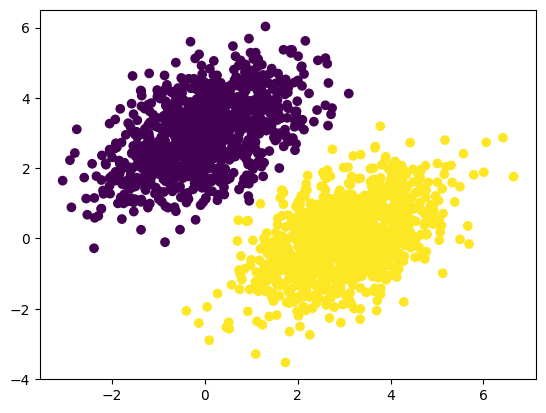

In [ ]:
predictions = model_without_keras(inputs)
print(Bias)
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0] > 0.5)
plt.show()

$$
Prediction == [[w1],[w2]] \cdot [x,y] + b = w1*x + w2*y +b
$$

Class 0 is when  : $w1*x + w2*y +b < 0.5$

and class 1 is when : $w1*x + w2*y +b > 0.5$

in 2D plane

$$
 w1*x + w2*y + b = 0.5
$$
$$
y = -\frac{w1}{w2} * x + \frac{(0.5-b)}{w2}
$$

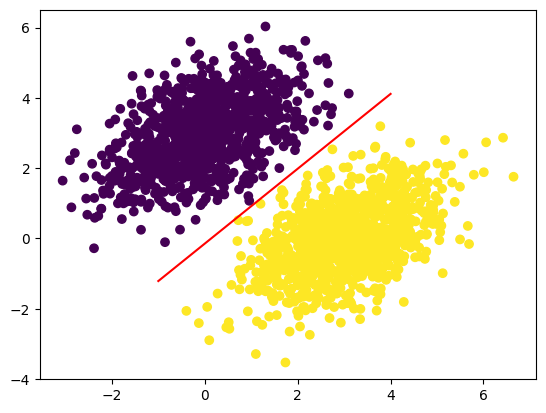

In [ ]:
x = np.linspace(-1, 4, 100)
y = - Weight[0] / Weight[1] * x + (0.5 - Bias) / Weight[1]

plt.plot(x,y, '-r')
plt.scatter(
    inputs[:,0],
    inputs[:,1],
    c = predictions[:,0] > 0.5
)

# **Linear Classification with Keras**

In [ ]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np

In [ ]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

In [ ]:
x2 = np.vstack((negative_samples, positive_samples)).astype(np.float32)
y2 = np.concatenate((np.zeros(num_samples_per_class), np.ones(num_samples_per_class)))

print(x2)
print(y2)

[[-0.27617234  1.3895802 ]
 [ 0.09742317  2.932082  ]
 [ 1.8708056   2.6096976 ]
 ...
 [ 3.0934901   0.55700415]
 [ 2.7684429   0.69084316]
 [ 3.0144663   1.3106688 ]]
[0. 0. 0. ... 1. 1. 1.]


In [ ]:
  model_LC = keras.Sequential([
      layers.Dense(1, activation = 'linear')
  ])
  model_LC.compile(
      optimizer = 'adam',
      loss = 'binary_crossentropy',
      metrics = 'accuracy'
  )

In [ ]:
model_LC.fit(x2, y2, epochs = 10, batch_size = 26, validation_split = 0.1)

Epoch 1/10
70/70 [==============================] - 1s 5ms/step - loss: 0.0837 - accuracy: 0.9806 - val_loss: 0.0632 - val_accuracy: 0.9850
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9900 - val_loss: 0.0377 - val_accuracy: 0.9900
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9939 - val_loss: 0.0291 - val_accuracy: 0.9950
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9956 - val_loss: 0.0237 - val_accuracy: 0.9950
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9961 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 6/10
70/70 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9961 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 7/10
70/70 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9961 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 8/10
70/70 [==

In [ ]:
Weights2 = model_LC.layers[0].get_weights()[0]
Bias2 = model_LC.layers[0].get_weights()[1]
print(Weights2.shape, Bias2.shape)

(2, 1) (1,)


63/63 [==============================] - 0s 1ms/step


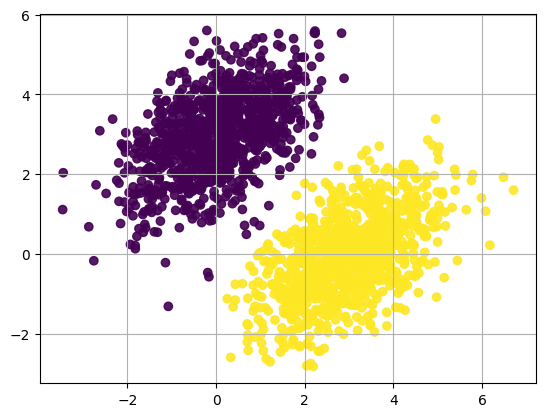

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x2[:,0],
            x2[:,1],
            alpha = 0.9,
            c = model_LC.predict(x2) > 0.5)
plt.grid()

63/63 [==============================] - 0s 2ms/step


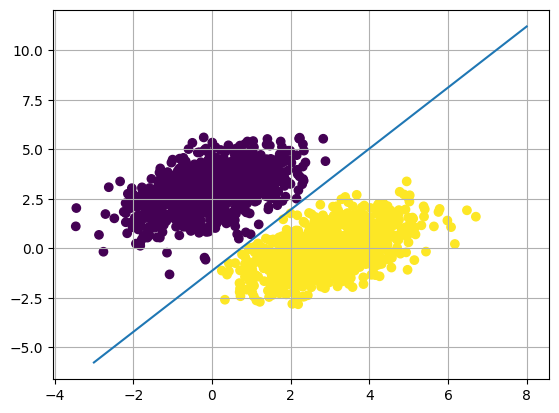

In [ ]:
x_vals = np.linspace(-3, 8, 2000)
y_vals = - Weights2[0] / Weights2[1] * x_vals + (0.5 - Bias2) / Weights2[1]
plt.plot(x_vals,y_vals)
plt.grid()
plt.scatter(
    x2[:,0],
    x2[:,1],
    c = model_LC.predict(x2) > 0.5
)